## Pytorch Neural Network
---


In [1]:
import os
import torch
from torch import nn   ## 신경망 모듈
from torch.utils.data import DataLoader  # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms   # torch 저장소 데이터셋 모듈

### [1] 데이터 준비
---

In [2]:
# Tensor의 저장소 설정을 위한 체크
# cuda가 있는지 없는지 확인
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### NN 모델 생성
---

In [4]:
# 순차적인 Layer 구성 => Sequential, Layer ...
class NeuralNetwork(nn.Module):   # nn.Module은 상속
    
    # 생성자 메서드, NeuralNetwork() 객체 생성시 실행됨
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        self.linear_relu_stack = nn.Sequential(
            # 입력층(input_dim, output_dim)
            nn.Linear(28*28, 512),   # 이게 모델임
            nn.ReLU(),
            
            # 은닉층(input_dim, output_dim)
            nn.Linear(512, 512),
            nn.ReLU(),
            
            # 출력층(input_dim, output_dim)
            nn.Linear(512, 10),
        )

    # NN 모델이 동작을 시작할 때 실행
    def forward(self, x):
        # 1차원으로 데이터 변환
        x = self.flatten(x)
        
        # NN 모델에 데이터 전달
        logits = self.linear_relu_stack(x)  # 1차원으로 폈는거 모델에 넣은거임
        return logits

In [7]:
# NN 모델 생성
mnistM=NeuralNetwork().to(device)

mnistM.flatten   # 얘가 함수 안에 self.flatten임  
mnistM.linear_relu_stack

In [8]:
# 모델 구조
print(mnistM)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
# 데이터 준비
# rand : 0.0 ~ 1.0
X = torch.rand(1, 28, 28, device=device)
#print(f'X => {X}')
print(X.shape, X.ndim)

torch.Size([1, 28, 28]) 3


In [12]:
torch.rand(3, 2, 1)

tensor([[[0.0486],
         [0.3126]],

        [[0.0281],
         [0.8244]],

        [[0.4965],
         [0.9967]]])

In [14]:
# 학습
logits = mnistM(X)

In [18]:
print(f'학습 결과 :\n{logits}, {logits.shape}')

학습 결과 :
tensor([[-0.0089, -0.0234, -0.0438,  0.0773, -0.0622,  0.0064,  0.0734, -0.0661,
          0.0598, -0.0106]], grad_fn=<AddmmBackward0>), torch.Size([1, 10])


In [19]:
# 결과 분석
pred_probab = nn.Softmax(dim=1)(logits)   # 확률값 받아오기
print(f'pred_probab : {pred_probab}')

y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

pred_probab : tensor([[0.0990, 0.0975, 0.0956, 0.1079, 0.0938, 0.1005, 0.1075, 0.0935, 0.1060,
         0.0988]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([3])


---

## PyTorch의 Dataset 사용

In [20]:
from torchvision.transforms import ToTensor  # 데이터 => Tensor로 변환

training_data = datasets.FashionMNIST(
    root="data",
    train=True,   # True면 training용, False면 test용
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # test용
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [22]:
print(type(training_data), training_data.data.shape)
print(type(test_data), test_data.data.shape)

<class 'torchvision.datasets.mnist.FashionMNIST'> torch.Size([60000, 28, 28])
<class 'torchvision.datasets.mnist.FashionMNIST'> torch.Size([10000, 28, 28])


https://github.com/zalandoresearch/fashion-mnist

img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img.squeeze => torch.Size([28, 28])


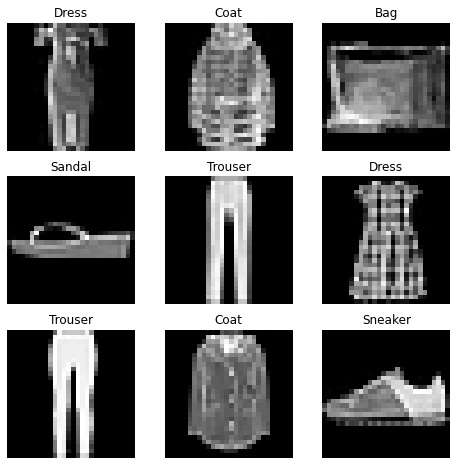

In [27]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print(f'img => {img.shape}')
    a=img.squeeze()
    print(f'img.squeeze => {a.shape}')
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

ds = datasets.FashionMNIST(  
    root="data",  
    train=True,  
    download=True,  
    transform=ToTensor(),  
    target_transform=Lambda(lambda y: torch.zeros(10,   dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)   # 원핫인코딩

In [28]:
t1=torch.tensor([1, 2, 3])
t1.add(10)   # t1이 바뀐 게 아님

tensor([11, 12, 13])

In [29]:
t1

tensor([1, 2, 3])

In [30]:
t1.add_(10)
t1

tensor([11, 12, 13])